<a href="https://colab.research.google.com/github/Dfgr109109/proyecto/blob/main/Capitulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.**	Observe sus comportamientos en la casa, en la universidad y en el medio de transporte que utiliza. Encuentre, para cada uno de estos escenarios sus reglas básicas.

**Casa**
  1.	Lavar ropa 1 vez a la semana.
  2.	Nunca dejar la puerta sin llave.
  3.	Mantener limpieza general diaria.

**Universidad**
1.	Nunca llegar más de 15 minutos tarde a clase.
2.	No usar redes sociales durante el tiempo de clases.
3.	Asistir a todas las clases programadas (excepto si se incumple la regla de tardanza).
4.	Participar activamente en clase si no hay distracciones.

**Transporte**
1.	Siempre tener la mitad del tanque de gasolina o más antes de iniciar un viaje.
2.	Usar cinturón de seguridad en todo momento.
3.	No usar el celular mientras se conduce.
4.	Respetar los límites de velocidad.
5.	Mantener distancia segura con el vehículo de adelante.


**2.**	Suponga una enfermedad, o un incendio forestal, o una moda, desarrolle un modelo de difusión usando ACs probabilísticos. O simule un robot con dos ruedas que evite obstáculos. Use LLMs.

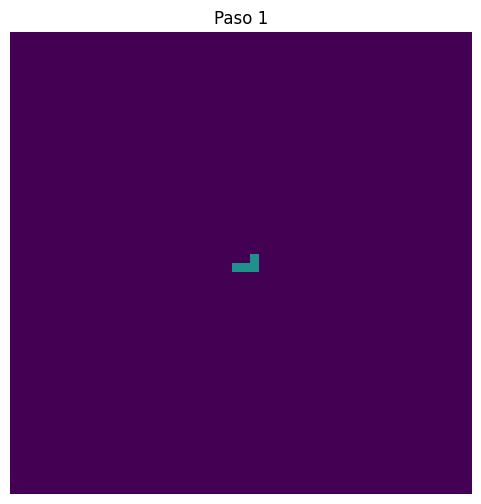

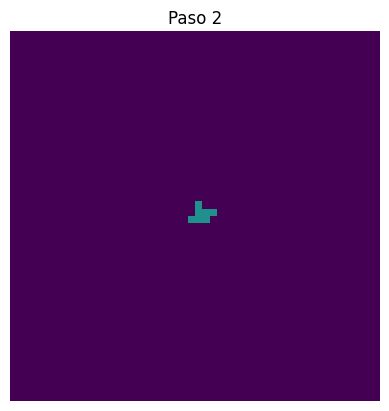

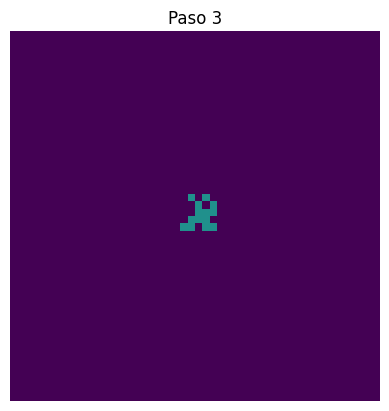

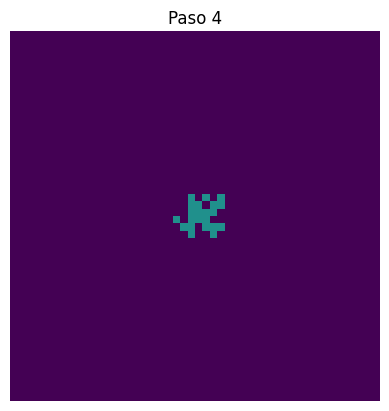

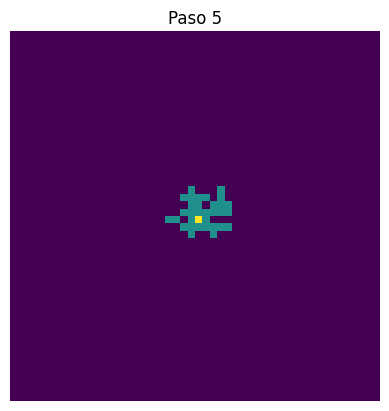

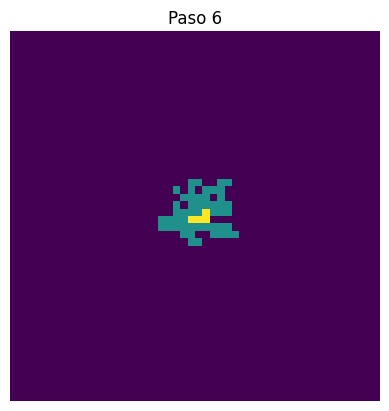

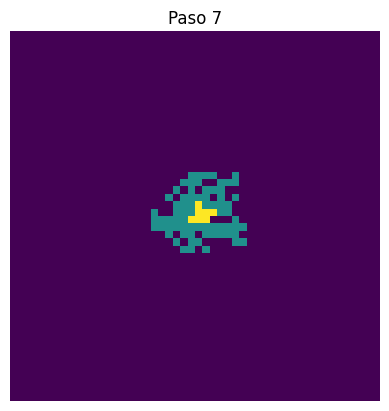

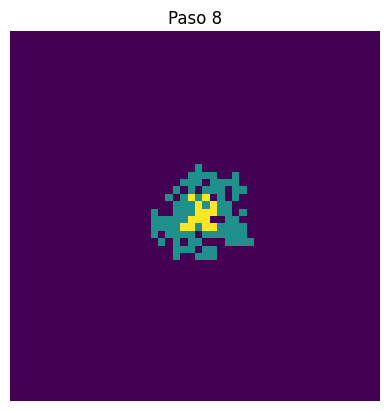

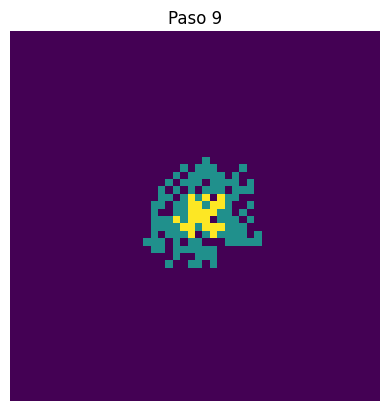

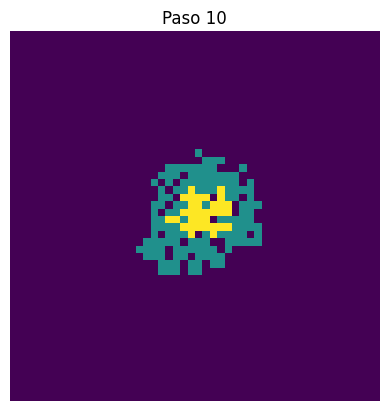

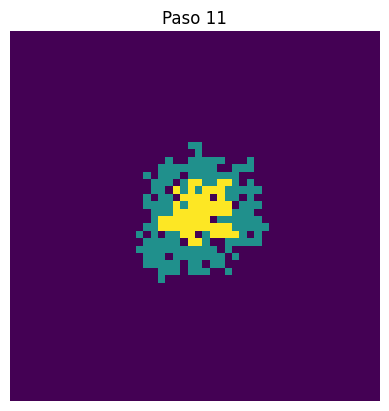

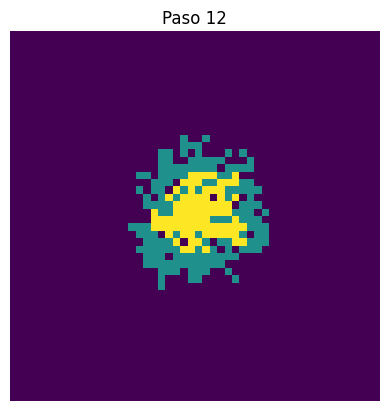

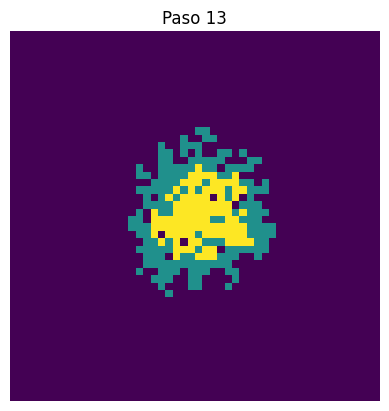

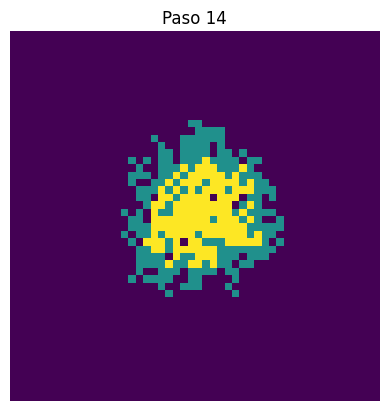

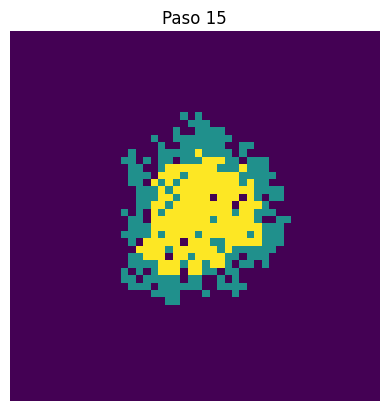

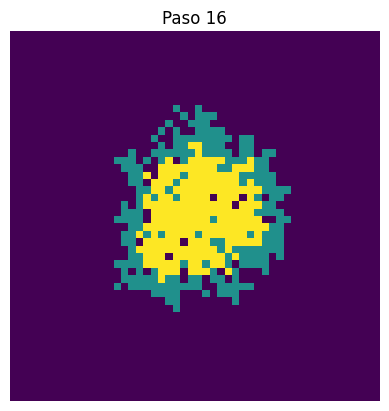

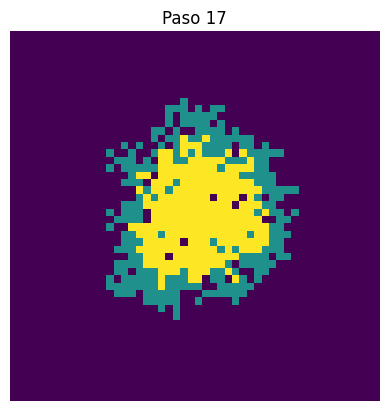

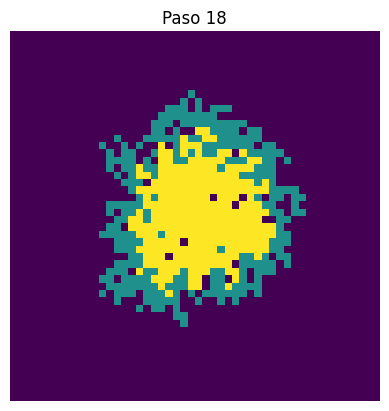

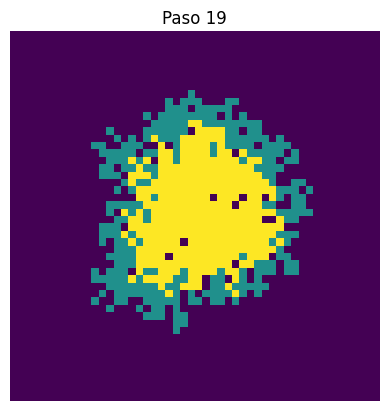

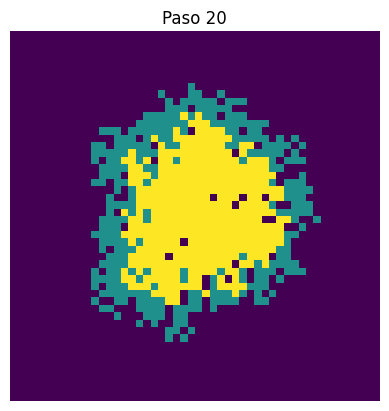

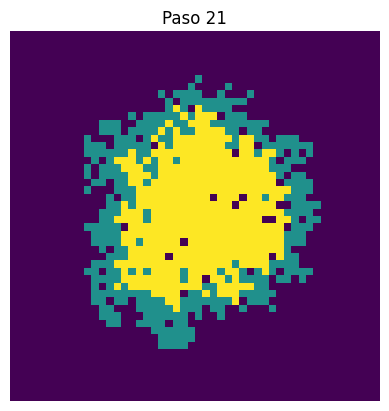

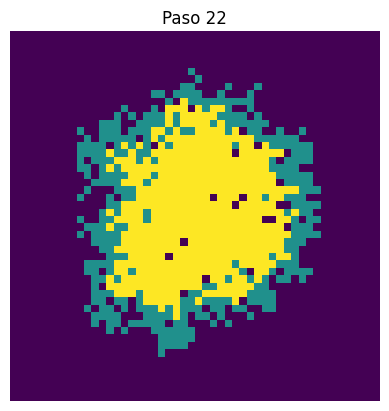

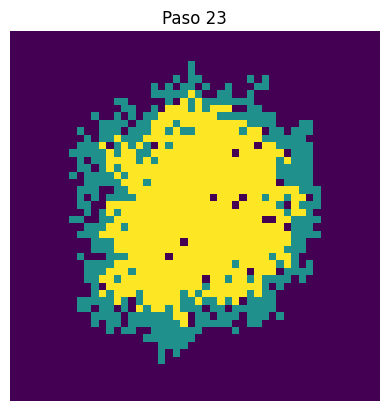

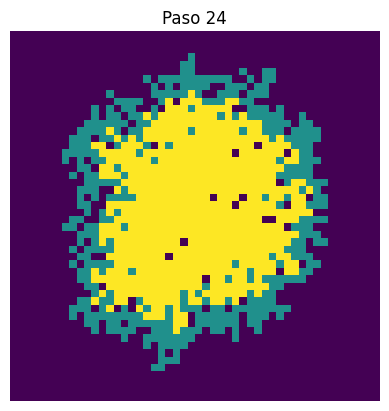

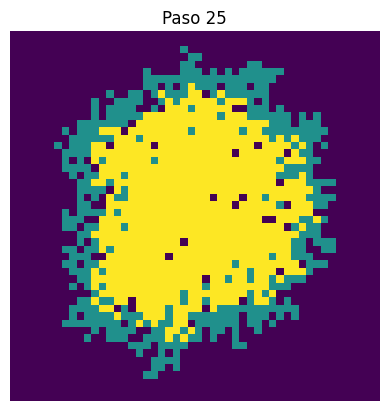

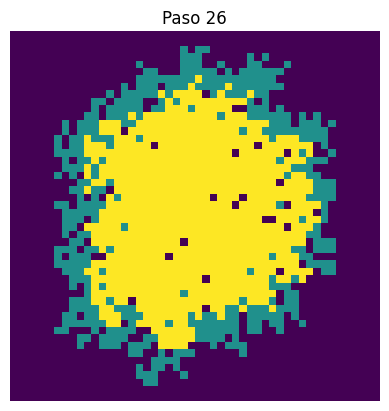

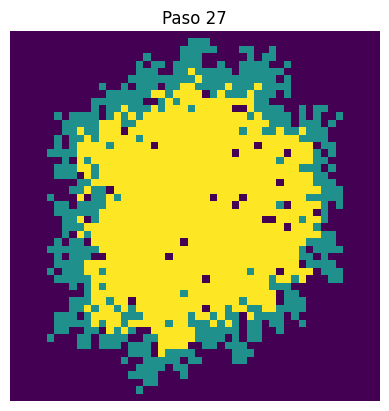

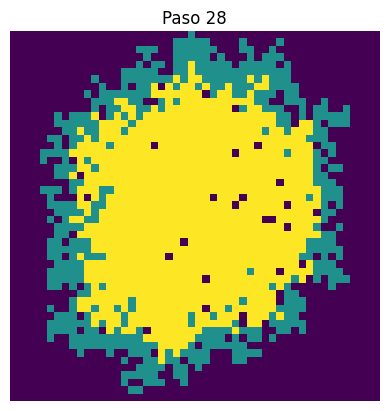

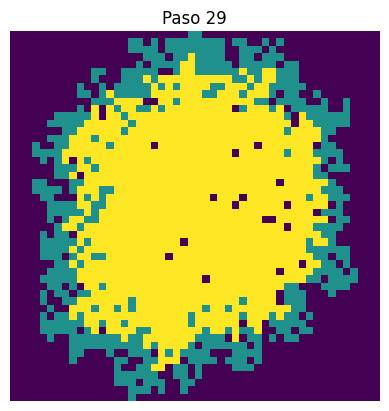

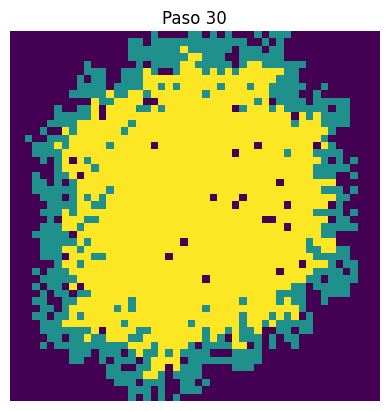

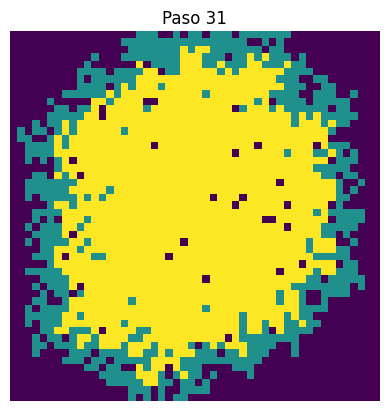

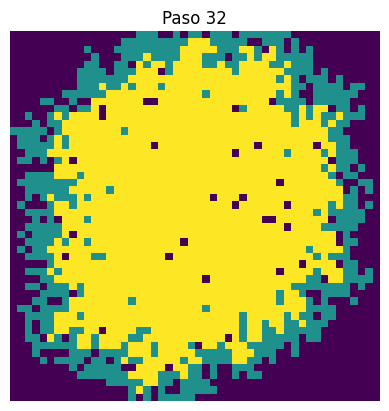

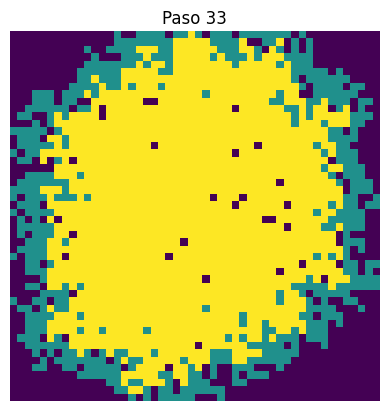

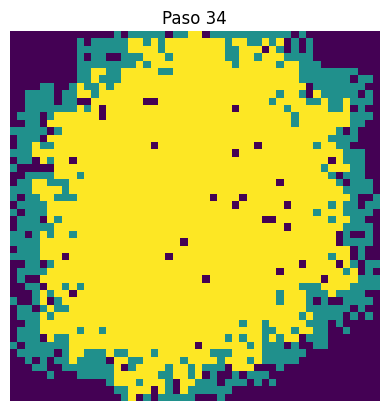

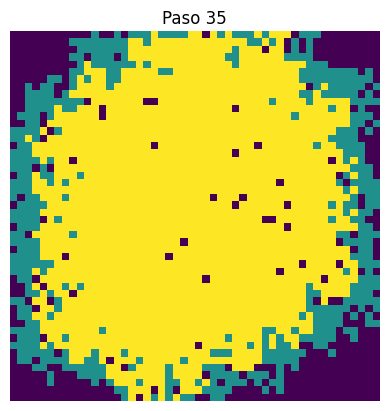

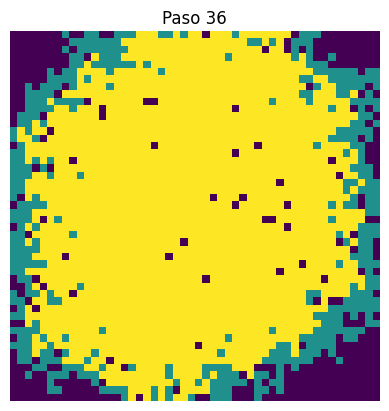

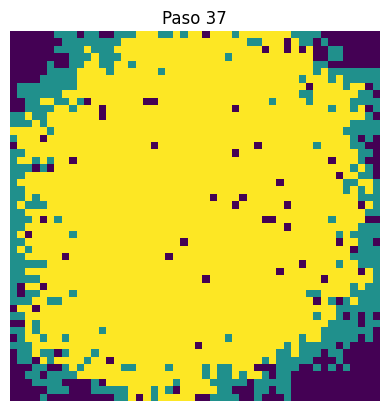

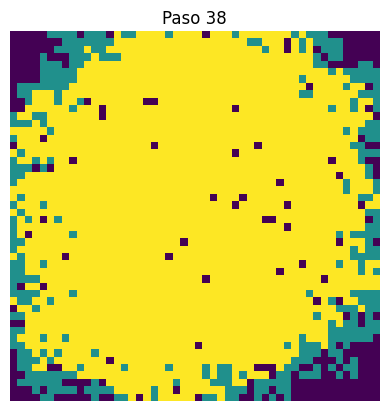

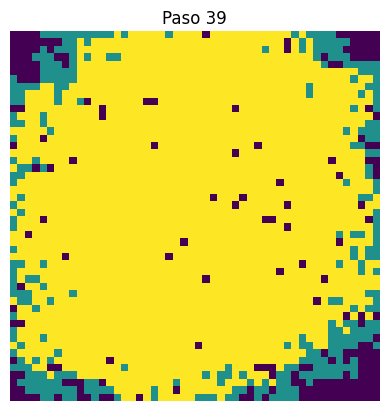

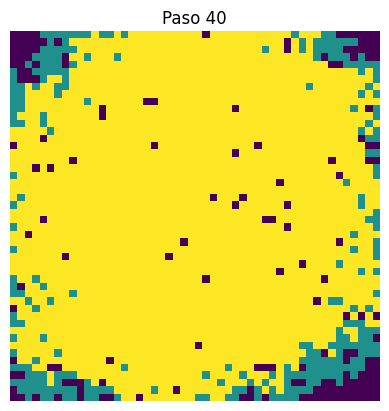

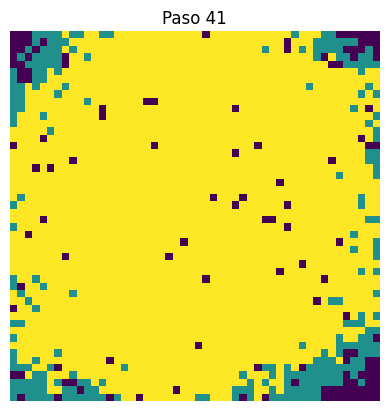

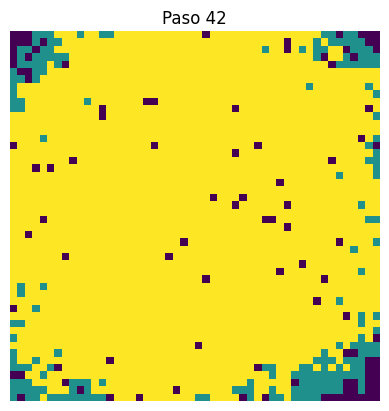

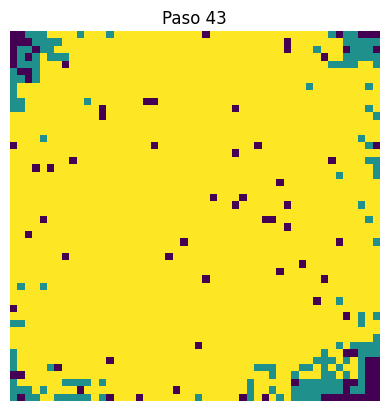

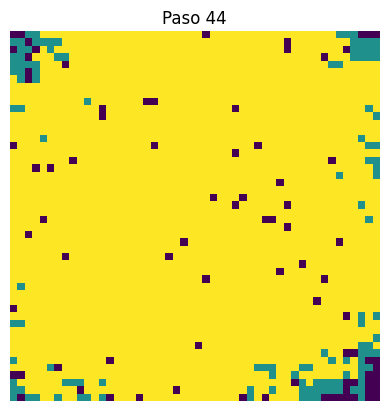

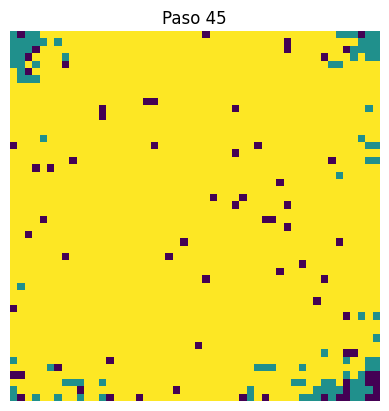

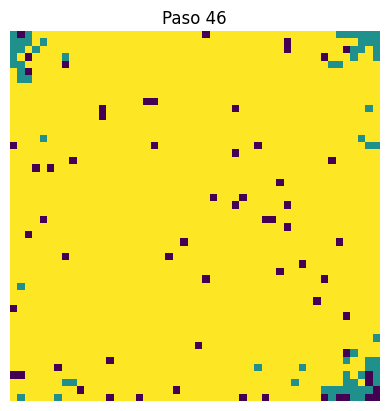

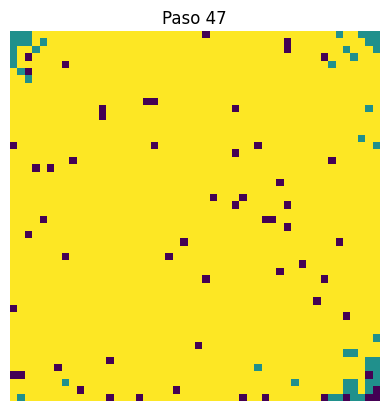

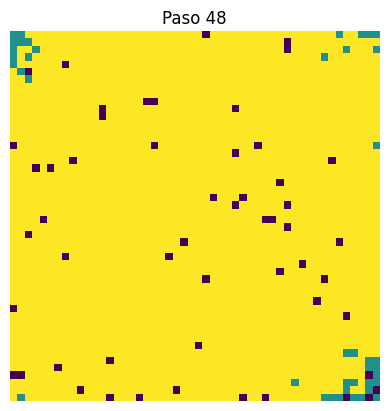

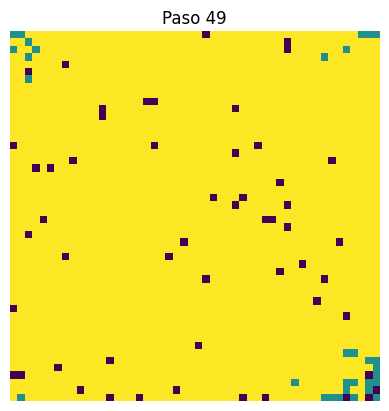

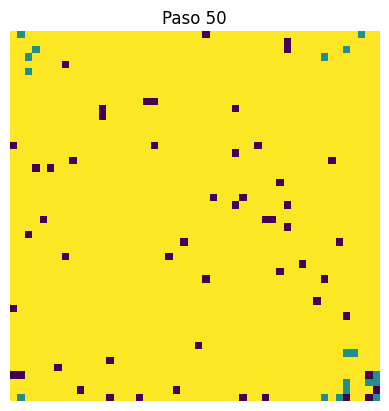

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# Estados
SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2

# Parámetros
size = 50  # Tamaño de la cuadrícula
p_infeccion = 0.3
t_recuperacion = 5
pasos_simulacion = 50

# Inicializar grid
grid = np.zeros((size, size), dtype=int)
tiempo_infeccion = np.zeros((size, size), dtype=int)

# Infectar una celda central para iniciar la epidemia
grid[size//2, size//2] = INFECTED
tiempo_infeccion[size//2, size//2] = 1

def vecinos(i, j, grid):
    vecinos = []
    for x in range(max(0, i-1), min(size, i+2)):
        for y in range(max(0, j-1), min(size, j+2)):
            if (x, y) != (i, j):
                vecinos.append((x, y))
    return vecinos

plt.figure(figsize=(6,6))

for paso in range(pasos_simulacion):
    grid_nuevo = grid.copy()
    tiempo_infeccion_nuevo = tiempo_infeccion.copy()
    for i in range(size):
        for j in range(size):
            if grid[i, j] == SUSCEPTIBLE:
                vecinos_celdas = vecinos(i, j, grid)
                infectados_cercanos = sum(grid[x, y] == INFECTED for x, y in vecinos_celdas)
                if infectados_cercanos > 0:
                    if np.random.rand() < p_infeccion:
                        grid_nuevo[i, j] = INFECTED
                        tiempo_infeccion_nuevo[i, j] = 1
            elif grid[i, j] == INFECTED:
                tiempo_infeccion_nuevo[i, j] += 1
                if tiempo_infeccion_nuevo[i, j] > t_recuperacion:
                    grid_nuevo[i, j] = RECOVERED
    grid = grid_nuevo
    tiempo_infeccion = tiempo_infeccion_nuevo

    plt.cla()
    plt.imshow(grid, cmap='viridis', vmin=0, vmax=2)
    plt.title(f"Paso {paso + 1}")
    plt.axis('off')
    plt.pause(0.1)

plt.show()




**3.** Tome el plano de una ciudad pequeña y localice, por ejemplo, las droguerías, o colegios ¿es posible que falte alguno en la ciudad? Incluya información adicional como densidad de personas. Utilice diagramas de Voronoi.


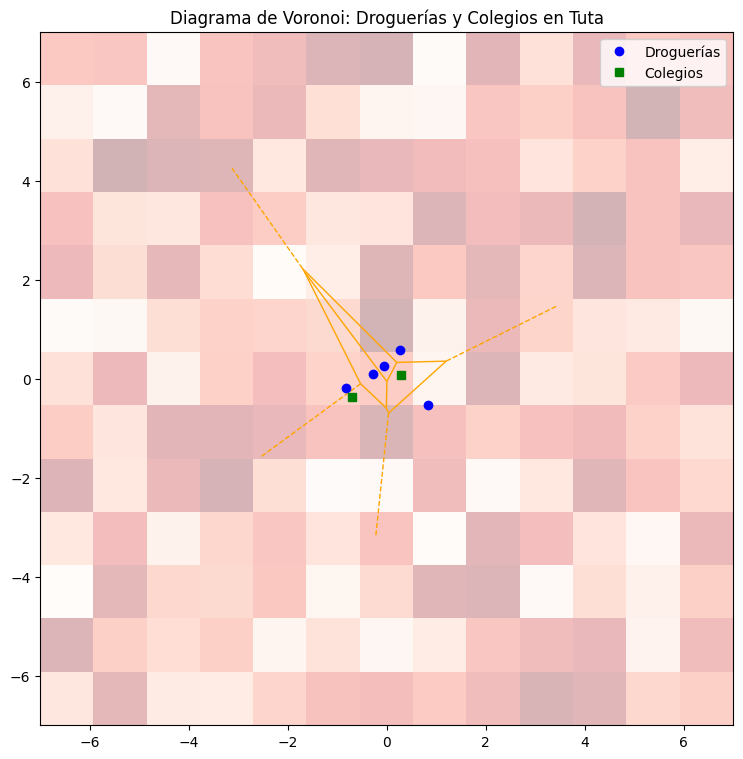

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Centro de Tuta en grados
lat_centro = 5.6897
lon_centro = -73.2275

# Función para convertir lat/lon a km relativos al centro
def geo_a_km(lat, lon):
    dlat = lat - lat_centro
    dlon = lon - lon_centro
    km_lat = dlat * 111  # km por grado latitud
    km_lon = dlon * 110.6  # km por grado longitud ajustado por cos(lat)
    return km_lon, km_lat  # X=longitud, Y=latitud

# Coordenadas geográficas de droguerías (simuladas)
droguerias_geo = [
    (5.6905, -73.2300),
    (5.6950, -73.2250),
    (5.6850, -73.2200),
    (5.6880, -73.2350),
    (5.6920, -73.2280)
]

# Coordenadas reales de colegios
colegios_geo = [
    (5.690391, -73.224880),
    (5.686435, -73.233850)
]

# Convertir a coordenadas km
droguerias_km = np.array([geo_a_km(lat, lon) for lat, lon in droguerias_geo])
colegios_km = np.array([geo_a_km(lat, lon) for lat, lon in colegios_geo])

# Límites de la ciudad (aprox 13x13 km para 165 km2)
city_limit = [-7, 7, -7, 7]

# Densidad poblacional simulada (13x13), normalizada
densidad_relativa = np.random.rand(13,13)
densidad_relativa /= densidad_relativa.sum()
poblacion_total = 8915
densidad_habitantes = densidad_relativa * poblacion_total

# Voronoi para droguerías + colegios juntos
todos_puntos = np.vstack([droguerias_km, colegios_km])
vor = Voronoi(todos_puntos)

# Graficar
fig, ax = plt.subplots(figsize=(9,9))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange')

# Droguerías en azul
ax.plot(droguerias_km[:,0], droguerias_km[:,1], 'bo', label='Droguerías')

# Colegios en verde
ax.plot(colegios_km[:,0], colegios_km[:,1], 'gs', label='Colegios')

# Densidad poblacional como fondo
ax.imshow(densidad_habitantes, extent=city_limit, origin='lower', cmap='Reds', alpha=0.3)

ax.set_xlim(city_limit[0], city_limit[1])
ax.set_ylim(city_limit[2], city_limit[3])
ax.set_title('Diagrama de Voronoi: Droguerías y Colegios en Tuta')
ax.legend()
plt.show()

